In [9]:
# Import helper
from api_utils import submit_task

# Send task to backend
result = submit_task("Reverse words in a sentence", "MockWindsurf")

# See the response
print(result)

{'task': 'Reverse words in a sentence', 'assistant': 'MockWindsurf', 'generated_code': "// Code for task: 'Reverse words in a sentence' by MockWindsurf\nprint('Hello from MockWindsurf')"}


In [10]:
import pandas as pd

# Load the logged data
df = pd.read_csv("../data/history.csv")

# Show the first few rows
df.head()

,timestamp,task,assistant,generated_code
0,2025-06-03T19:34:00,Check palindrome,MockGPT,// Code for task: 'Check palindrome' by MockGP...
1,2025-06-03T20:09:47,Reverse words in a sentence,MockWindsurf,// Code for task: 'Reverse words in a sentence...
2,2025-06-05T10:41:49,Reverse words in a sentence,MockWindsurf,// Code for task: 'Reverse words in a sentence...


In [11]:
# Convert timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Check time range
df['timestamp'].min(), df['timestamp'].max()

(Timestamp('2025-06-03 19:34:00'), Timestamp('2025-06-05 10:41:49'))

C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_27516\3296234766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='assistant', palette='pastel')


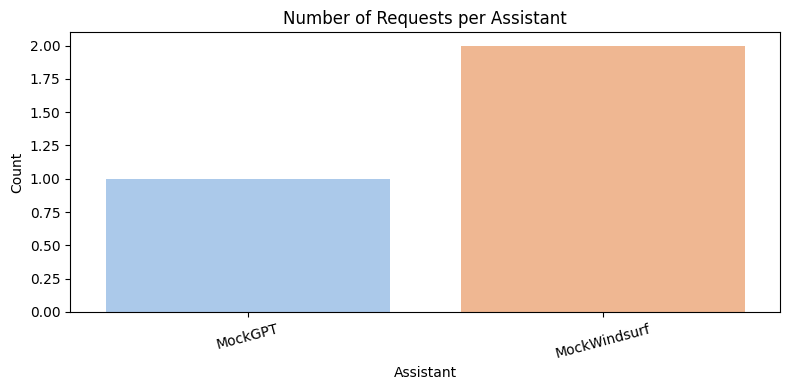

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='assistant', palette='pastel')
plt.title("Number of Requests per Assistant")
plt.ylabel("Count")
plt.xlabel("Assistant")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_27516\3111733966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=task_counts.values, y=task_counts.index, palette="crest")


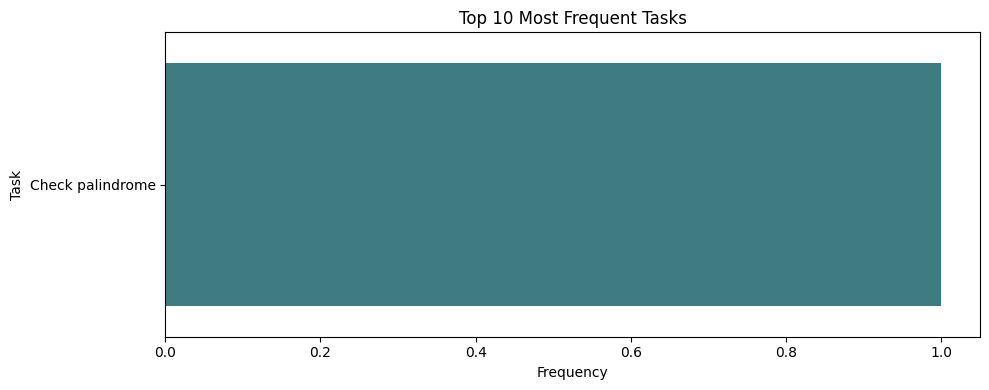

In [4]:
# Count most common tasks
task_counts = df['task'].value_counts().head(10)

# Bar plot of top tasks
plt.figure(figsize=(10, 4))
sns.barplot(x=task_counts.values, y=task_counts.index, palette="crest")
plt.title("Top 10 Most Frequent Tasks")
plt.xlabel("Frequency")
plt.ylabel("Task")
plt.tight_layout()
plt.show()


C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_27516\4018826091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='assistant', y='code_length', palette="Set2")


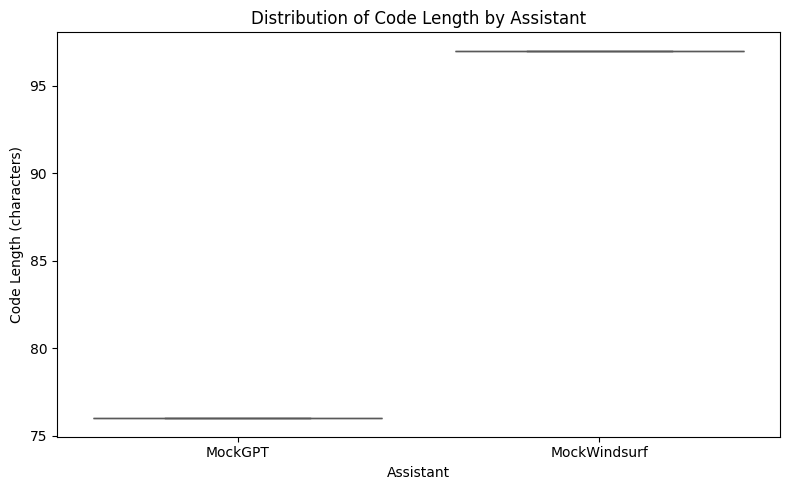

In [13]:
# Calculate code length (number of characters)
df['code_length'] = df['generated_code'].apply(len)

# Boxplot: Code length by assistant
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='assistant', y='code_length', palette="Set2")
plt.title("Distribution of Code Length by Assistant")
plt.xlabel("Assistant")
plt.ylabel("Code Length (characters)")
plt.tight_layout()
plt.show()


In [21]:
def refresh_visuals():
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # ✅ Corrected path to history.csv
    df = pd.read_csv("../data/history.csv")

    # Convert timestamp column to datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Calculate length of generated code
    df['code_length'] = df['generated_code'].apply(len)

    # Create a 2x2 grid of plots
    plt.figure(figsize=(14, 10))

    # 1️⃣ Countplot: Number of requests per assistant
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x='assistant', palette='pastel')
    plt.title("Number of Requests per Assistant")
    plt.xlabel("Assistant")
    plt.ylabel("Count")
    plt.xticks(rotation=15)

    # 2️⃣ Barplot: Top 10 most frequent tasks
    plt.subplot(2, 2, 2)
    task_counts = df['task'].value_counts().head(10)
    sns.barplot(x=task_counts.values, y=task_counts.index, palette='crest')
    plt.title("Top 10 Most Frequent Tasks")
    plt.xlabel("Frequency")
    plt.ylabel("Task")

    # 3️⃣ Boxplot: Code length per assistant
    plt.subplot(2, 1, 2)
    sns.boxplot(data=df, x='assistant', y='code_length', palette='Set2')
    plt.title("Distribution of Code Length by Assistant")
    plt.xlabel("Assistant")
    plt.ylabel("Code Length (characters)")

    plt.tight_layout()
    plt.show()


C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_27516\3689411226.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='assistant', palette='pastel')
C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_27516\3689411226.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=task_counts.values, y=task_counts.index, palette='crest')
C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_27516\3689411226.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='assistant', y='code_length', palette='Set2')


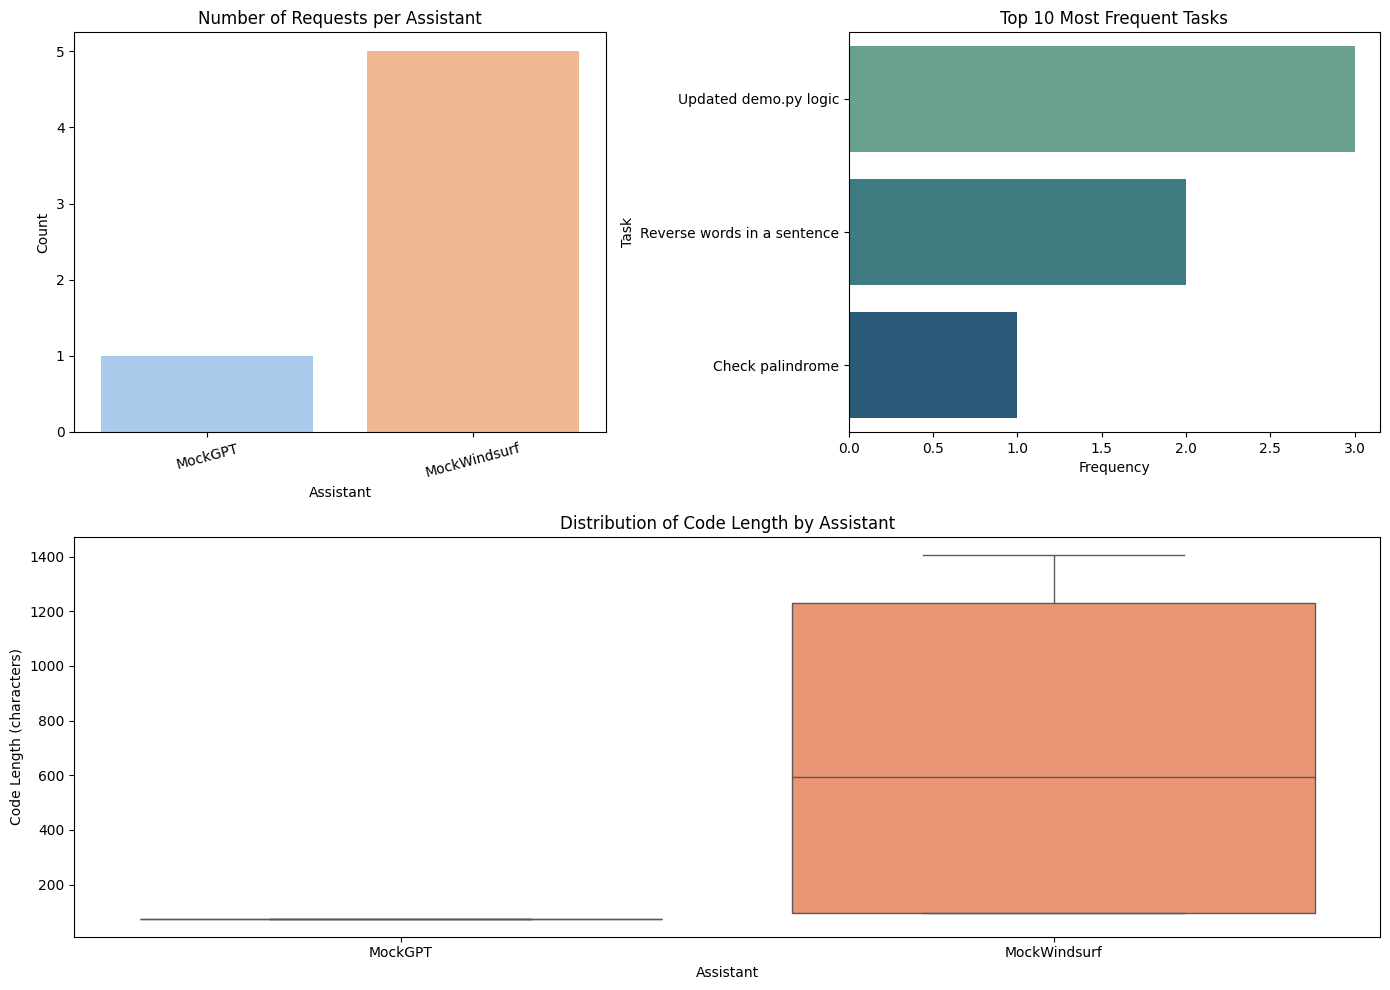

In [24]:
refresh_visuals()

In [1]:
# import time

# while True:
#     refresh_visuals()
#     time.sleep(10)  # Refresh every 10 seconds


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv("../data/history.csv")

# Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Add code length column
df['code_length'] = df['generated_code'].apply(len)

# Simulate response time (in seconds)
np.random.seed(42)
df['response_time'] = df['assistant'].map({
    'MockGPT': 1.2,
    'MockWindsurf': 1.8,
    'MockCursor': 1.5
}) + np.random.normal(0, 0.1, len(df))

# Simulate code accuracy (0–1)
df['accuracy'] = df['assistant'].map({
    'MockGPT': 0.87,
    'MockWindsurf': 0.91,
    'MockCursor': 0.83
}) + np.random.normal(0, 0.02, len(df))

# Show dataframe
df.tail()

,timestamp,task,assistant,generated_code,code_length,response_time,accuracy
1,2025-06-03 20:09:47,Reverse words in a sentence,MockWindsurf,// Code for task: 'Reverse words in a sentence...,97,1.786174,0.925349
2,2025-06-05 10:41:49,Reverse words in a sentence,MockWindsurf,// Code for task: 'Reverse words in a sentence...,97,1.864769,0.900611
3,2025-06-05 11:27:07,Updated demo.py logic,MockWindsurf,import requests\n\n# Task and assistant to sim...,1404,1.952303,0.920851
4,2025-06-05 11:27:14,Updated demo.py logic,MockWindsurf,import requests\n\n# Task and assistant to sim...,1231,1.776585,0.900732
5,2025-06-05 11:27:34,Updated demo.py logic,MockWindsurf,import requests\n\n# Task and assistant to sim...,594,1.776586,0.900685


C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_13764\3020076749.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='assistant', palette='Set2', ax=axs[0, 0])
C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_13764\3020076749.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='assistant', y='code_length', palette='coolwarm', ax=axs[0, 1])
C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_13764\3020076749.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='assistant', y='response_time', ax=axs[1, 0], palette='pastel'

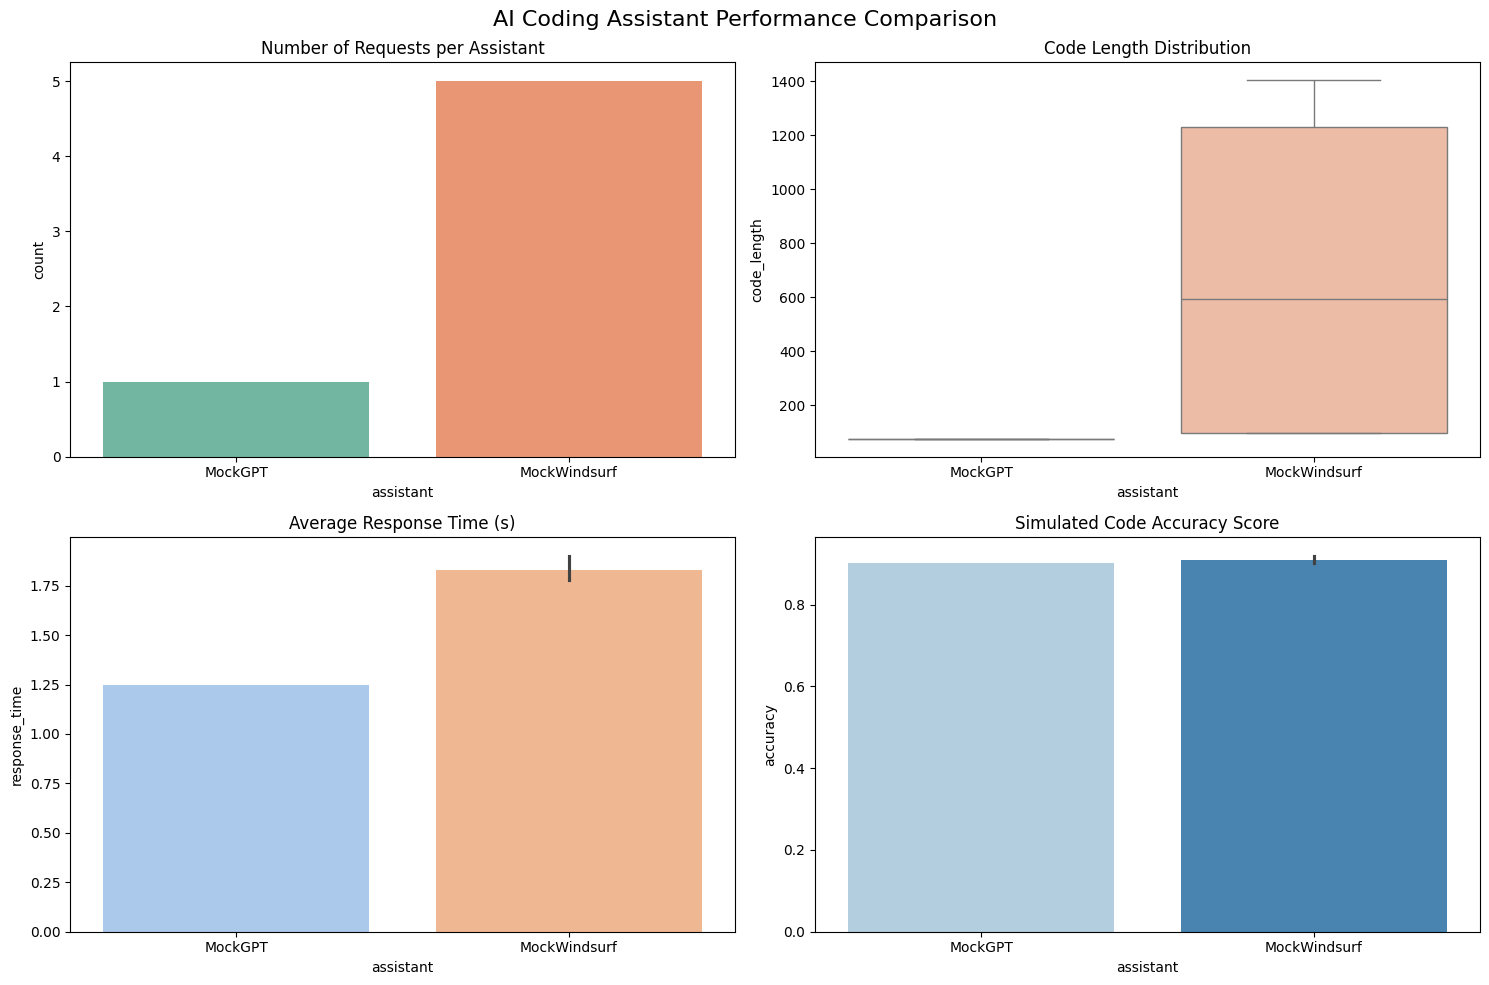

In [3]:
# Create subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Count of requests
sns.countplot(data=df, x='assistant', palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title("Number of Requests per Assistant")

# Code length
sns.boxplot(data=df, x='assistant', y='code_length', palette='coolwarm', ax=axs[0, 1])
axs[0, 1].set_title("Code Length Distribution")

# Response time
sns.barplot(data=df, x='assistant', y='response_time', ax=axs[1, 0], palette='pastel')
axs[1, 0].set_title("Average Response Time (s)")

# Accuracy
sns.barplot(data=df, x='assistant', y='accuracy', ax=axs[1, 1], palette='Blues')
axs[1, 1].set_title("Simulated Code Accuracy Score")

plt.suptitle("AI Coding Assistant Performance Comparison", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_13764\3307824613.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index('timestamp').groupby('assistant').resample('H').size().unstack(0).fillna(0).plot(figsize=(12, 4))


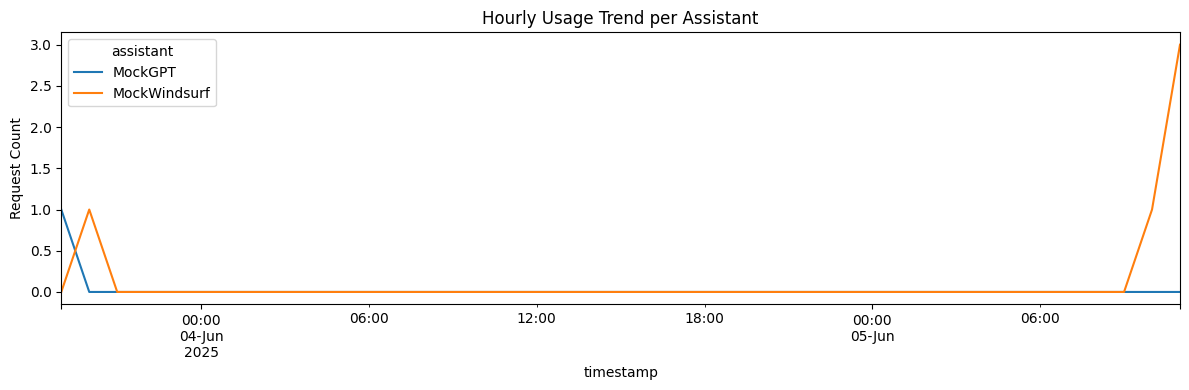

In [4]:
# Time trend of assistant usage
df.set_index('timestamp').groupby('assistant').resample('H').size().unstack(0).fillna(0).plot(figsize=(12, 4))
plt.title("Hourly Usage Trend per Assistant")
plt.ylabel("Request Count")
plt.tight_layout()
plt.show()


C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_13764\3469374502.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["hour"] = df["timestamp"].dt.floor("H")
C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_13764\3469374502.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="assistant", ax=axs[0, 0], palette="pastel")
C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_13764\3469374502.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tasks.values, y=top_tasks.index, ax=axs[0, 1], palette="crest")
C:\Users\ANUBAV\AppData\Local\Temp\ipykernel_13764\3469374502.py:31: FutureWarning: 

Passing `palette` without assigning `hue` 

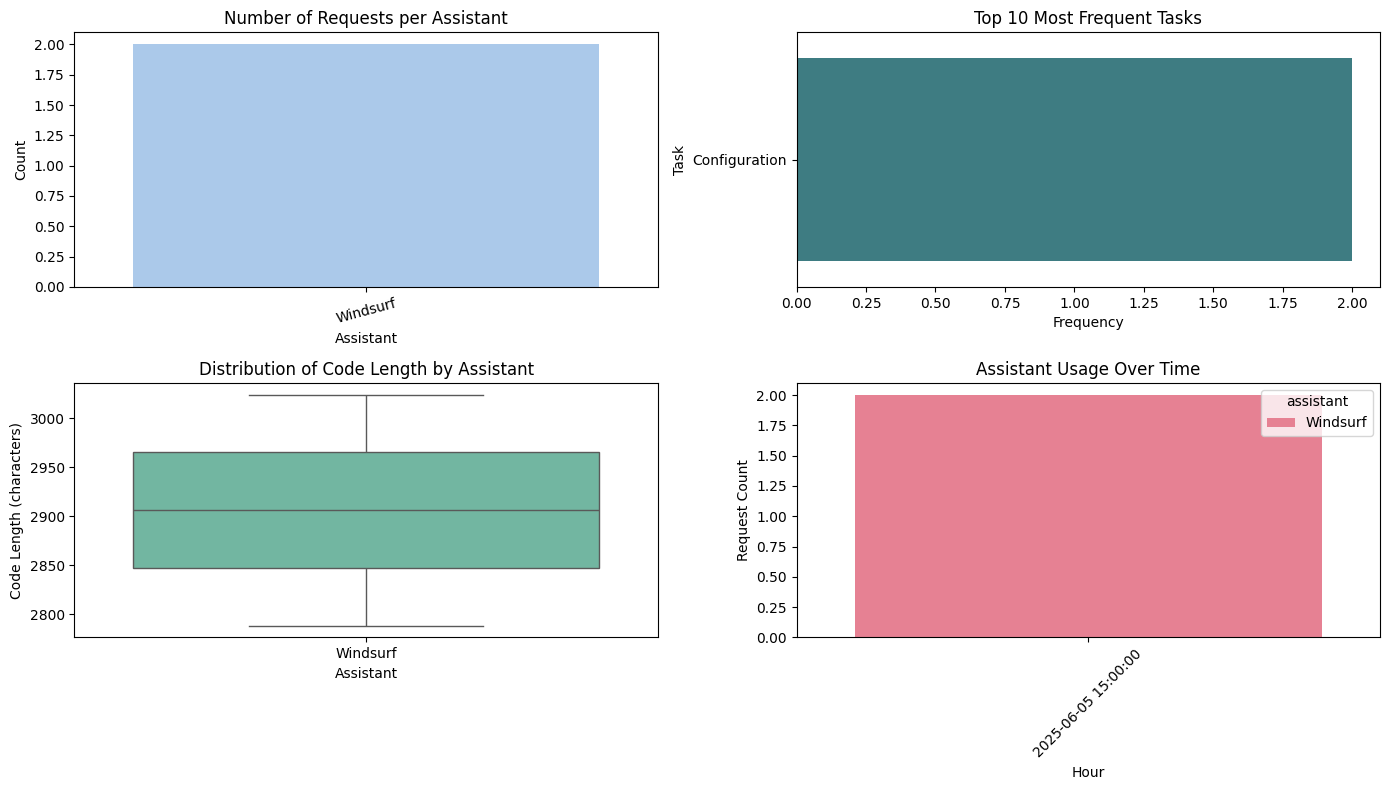

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Update correct path relative to the notebook
df = pd.read_csv("../data/history.csv")

# Preprocessing
df['timestamp'] = pd.to_datetime(df['timestamp'])
df["code_length"] = df["generated_code"].apply(len)
df["hour"] = df["timestamp"].dt.floor("H")

# Setup 2x2 grid for plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Plot 1: Number of Requests per Assistant
sns.countplot(data=df, x="assistant", ax=axs[0, 0], palette="pastel")
axs[0, 0].set_title("Number of Requests per Assistant")
axs[0, 0].set_xlabel("Assistant")
axs[0, 0].set_ylabel("Count")
axs[0, 0].tick_params(axis="x", rotation=15)

# Plot 2: Top Frequent Tasks
top_tasks = df["task"].value_counts().head(10)
sns.barplot(x=top_tasks.values, y=top_tasks.index, ax=axs[0, 1], palette="crest")
axs[0, 1].set_title("Top 10 Most Frequent Tasks")
axs[0, 1].set_xlabel("Frequency")
axs[0, 1].set_ylabel("Task")

# Plot 3: Code Length Distribution
sns.boxplot(data=df, x="assistant", y="code_length", ax=axs[1, 0], palette="Set2")
axs[1, 0].set_title("Distribution of Code Length by Assistant")
axs[1, 0].set_xlabel("Assistant")
axs[1, 0].set_ylabel("Code Length (characters)")

# Plot 4: Requests Over Time
sns.countplot(data=df, x="hour", hue="assistant", ax=axs[1, 1], palette="husl")
axs[1, 1].set_title("Assistant Usage Over Time")
axs[1, 1].set_xlabel("Hour")
axs[1, 1].set_ylabel("Request Count")
axs[1, 1].tick_params(axis="x", rotation=45)

# # Plot 5: Time trend of assistant usage
# df.set_index('timestamp').groupby('assistant').resample('H').size().unstack(0).fillna(0).plot(figsize=(12, 4))
# plt.title("Hourly Usage Trend per Assistant")
# plt.ylabel("Request Count")
# plt.tight_layout()
# plt.show()



plt.tight_layout()
plt.show()
